In [16]:
def IntialiseEnv():
    nb_dir = os.path.split(os.getcwd())[0]
    if nb_dir not in sys.path:
        sys.path.append(nb_dir)

In [25]:
# Libraries
import os
import sys
IntialiseEnv()
import tensorflow as tf
import numpy as np
import math
import pickle
import import_ipynb
import cv2

from PIL import Image  # ✅ Import this to fix the error

In [18]:
def ReadGermanTestDataSet():
    processedTestDataSet = 'DataSet/Processed_DataSet/GermanTestDataSet.pkl'
    isProcessedTestDataSetExits= os.path.exists(processedTestDataSet)
    test_image_array, test_image_labels = None, None
    
    if isProcessedTestDataSetExits:
        print("Loading Processed Test DataSet from Processed_DataSet/GermanTestDataSet.pkl")
        file = open(processedTestDataSet, 'rb')
        test_image_array, test_image_labels = pickle.load(file)
        file.close()
        print("Done Loading Test DataSet.")
        
    return test_image_array, test_image_labels

In [19]:
data_dir = r"F:\Universty\GP\line detection\Dataset"
train_path = os.path.join(data_dir, "Train")
test_path = os.path.join(data_dir, "Test")

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [20]:
NUM_CATEGORIES = len(os.listdir(train_path))
print("Total Categories:", NUM_CATEGORIES)


Total Categories: 43


In [2]:
# Define classes
classes = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons' 
}

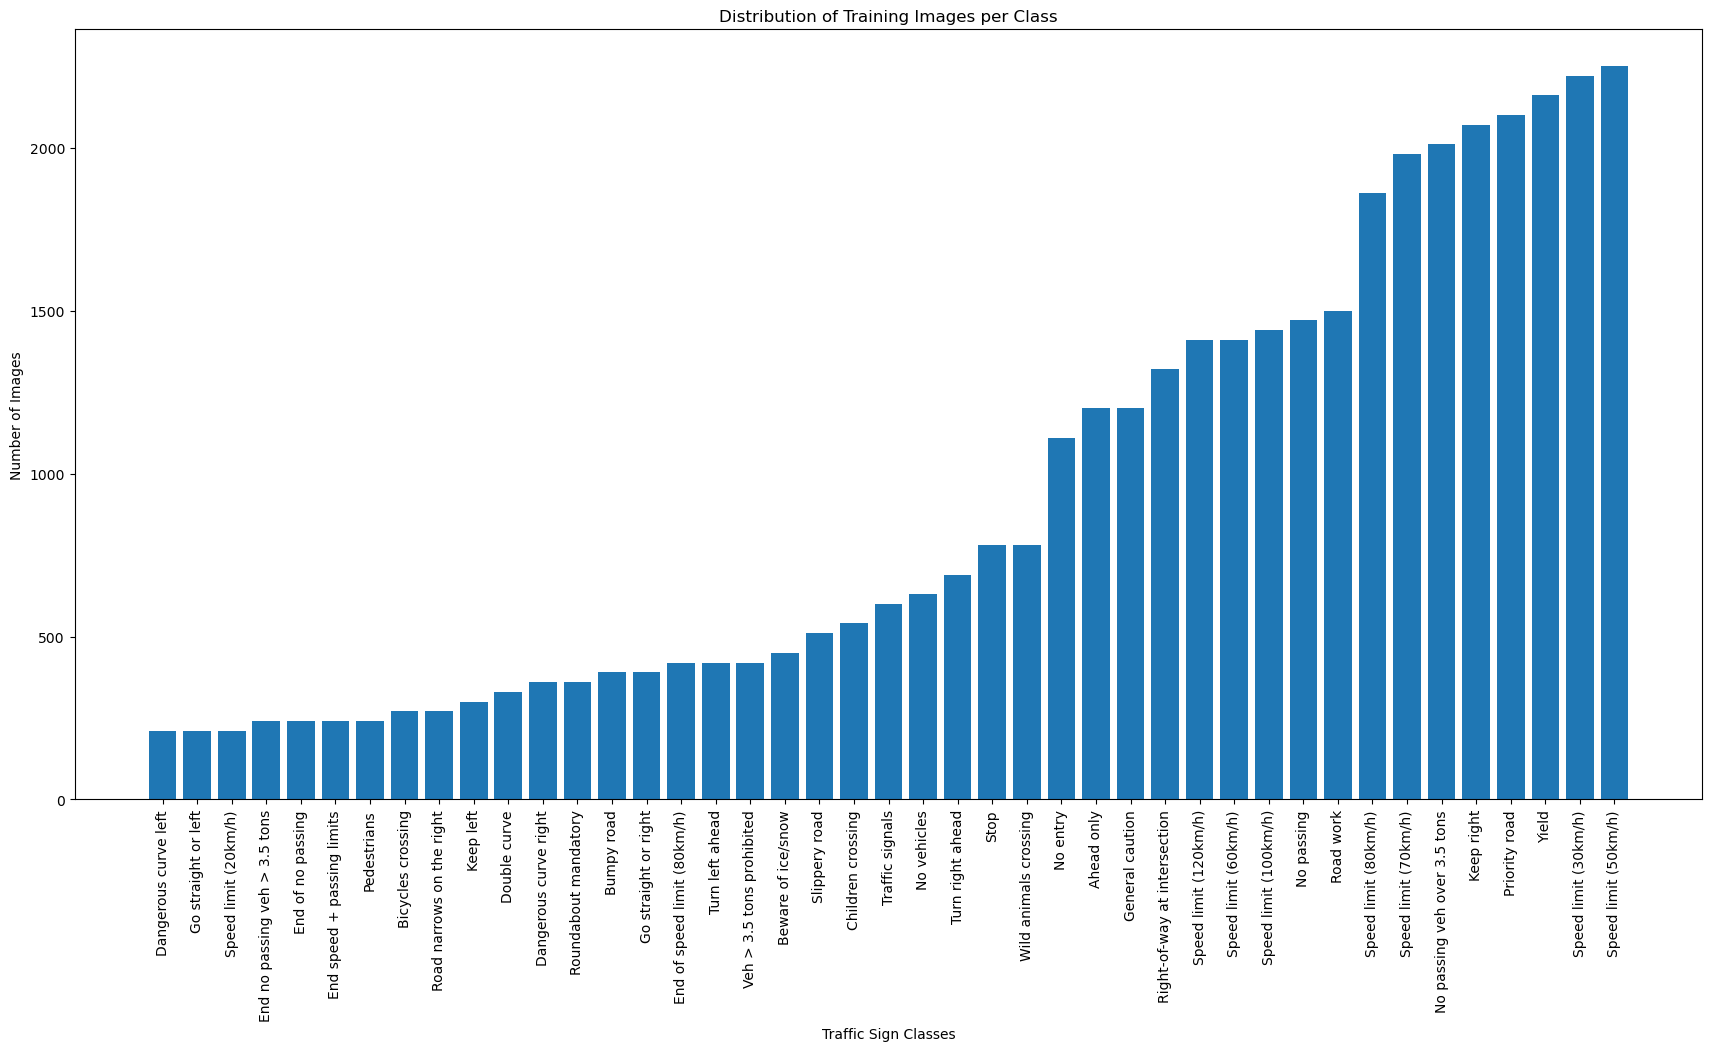

In [22]:
import matplotlib.pyplot as plt
# Get the list of class folders
folders = os.listdir(train_path)

train_number = []
class_num = []

# Count number of images per class
for folder in folders:
    train_files = os.listdir(os.path.join(train_path, folder))
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sort by number of images per class
sorted_pairs = sorted(zip(train_number, class_num))
train_number, class_num = zip(*sorted_pairs)

# Convert to lists
train_number = list(train_number)
class_num = list(class_num)

# Plot the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(rotation='vertical')
plt.xlabel("Traffic Sign Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Training Images per Class")
plt.show()

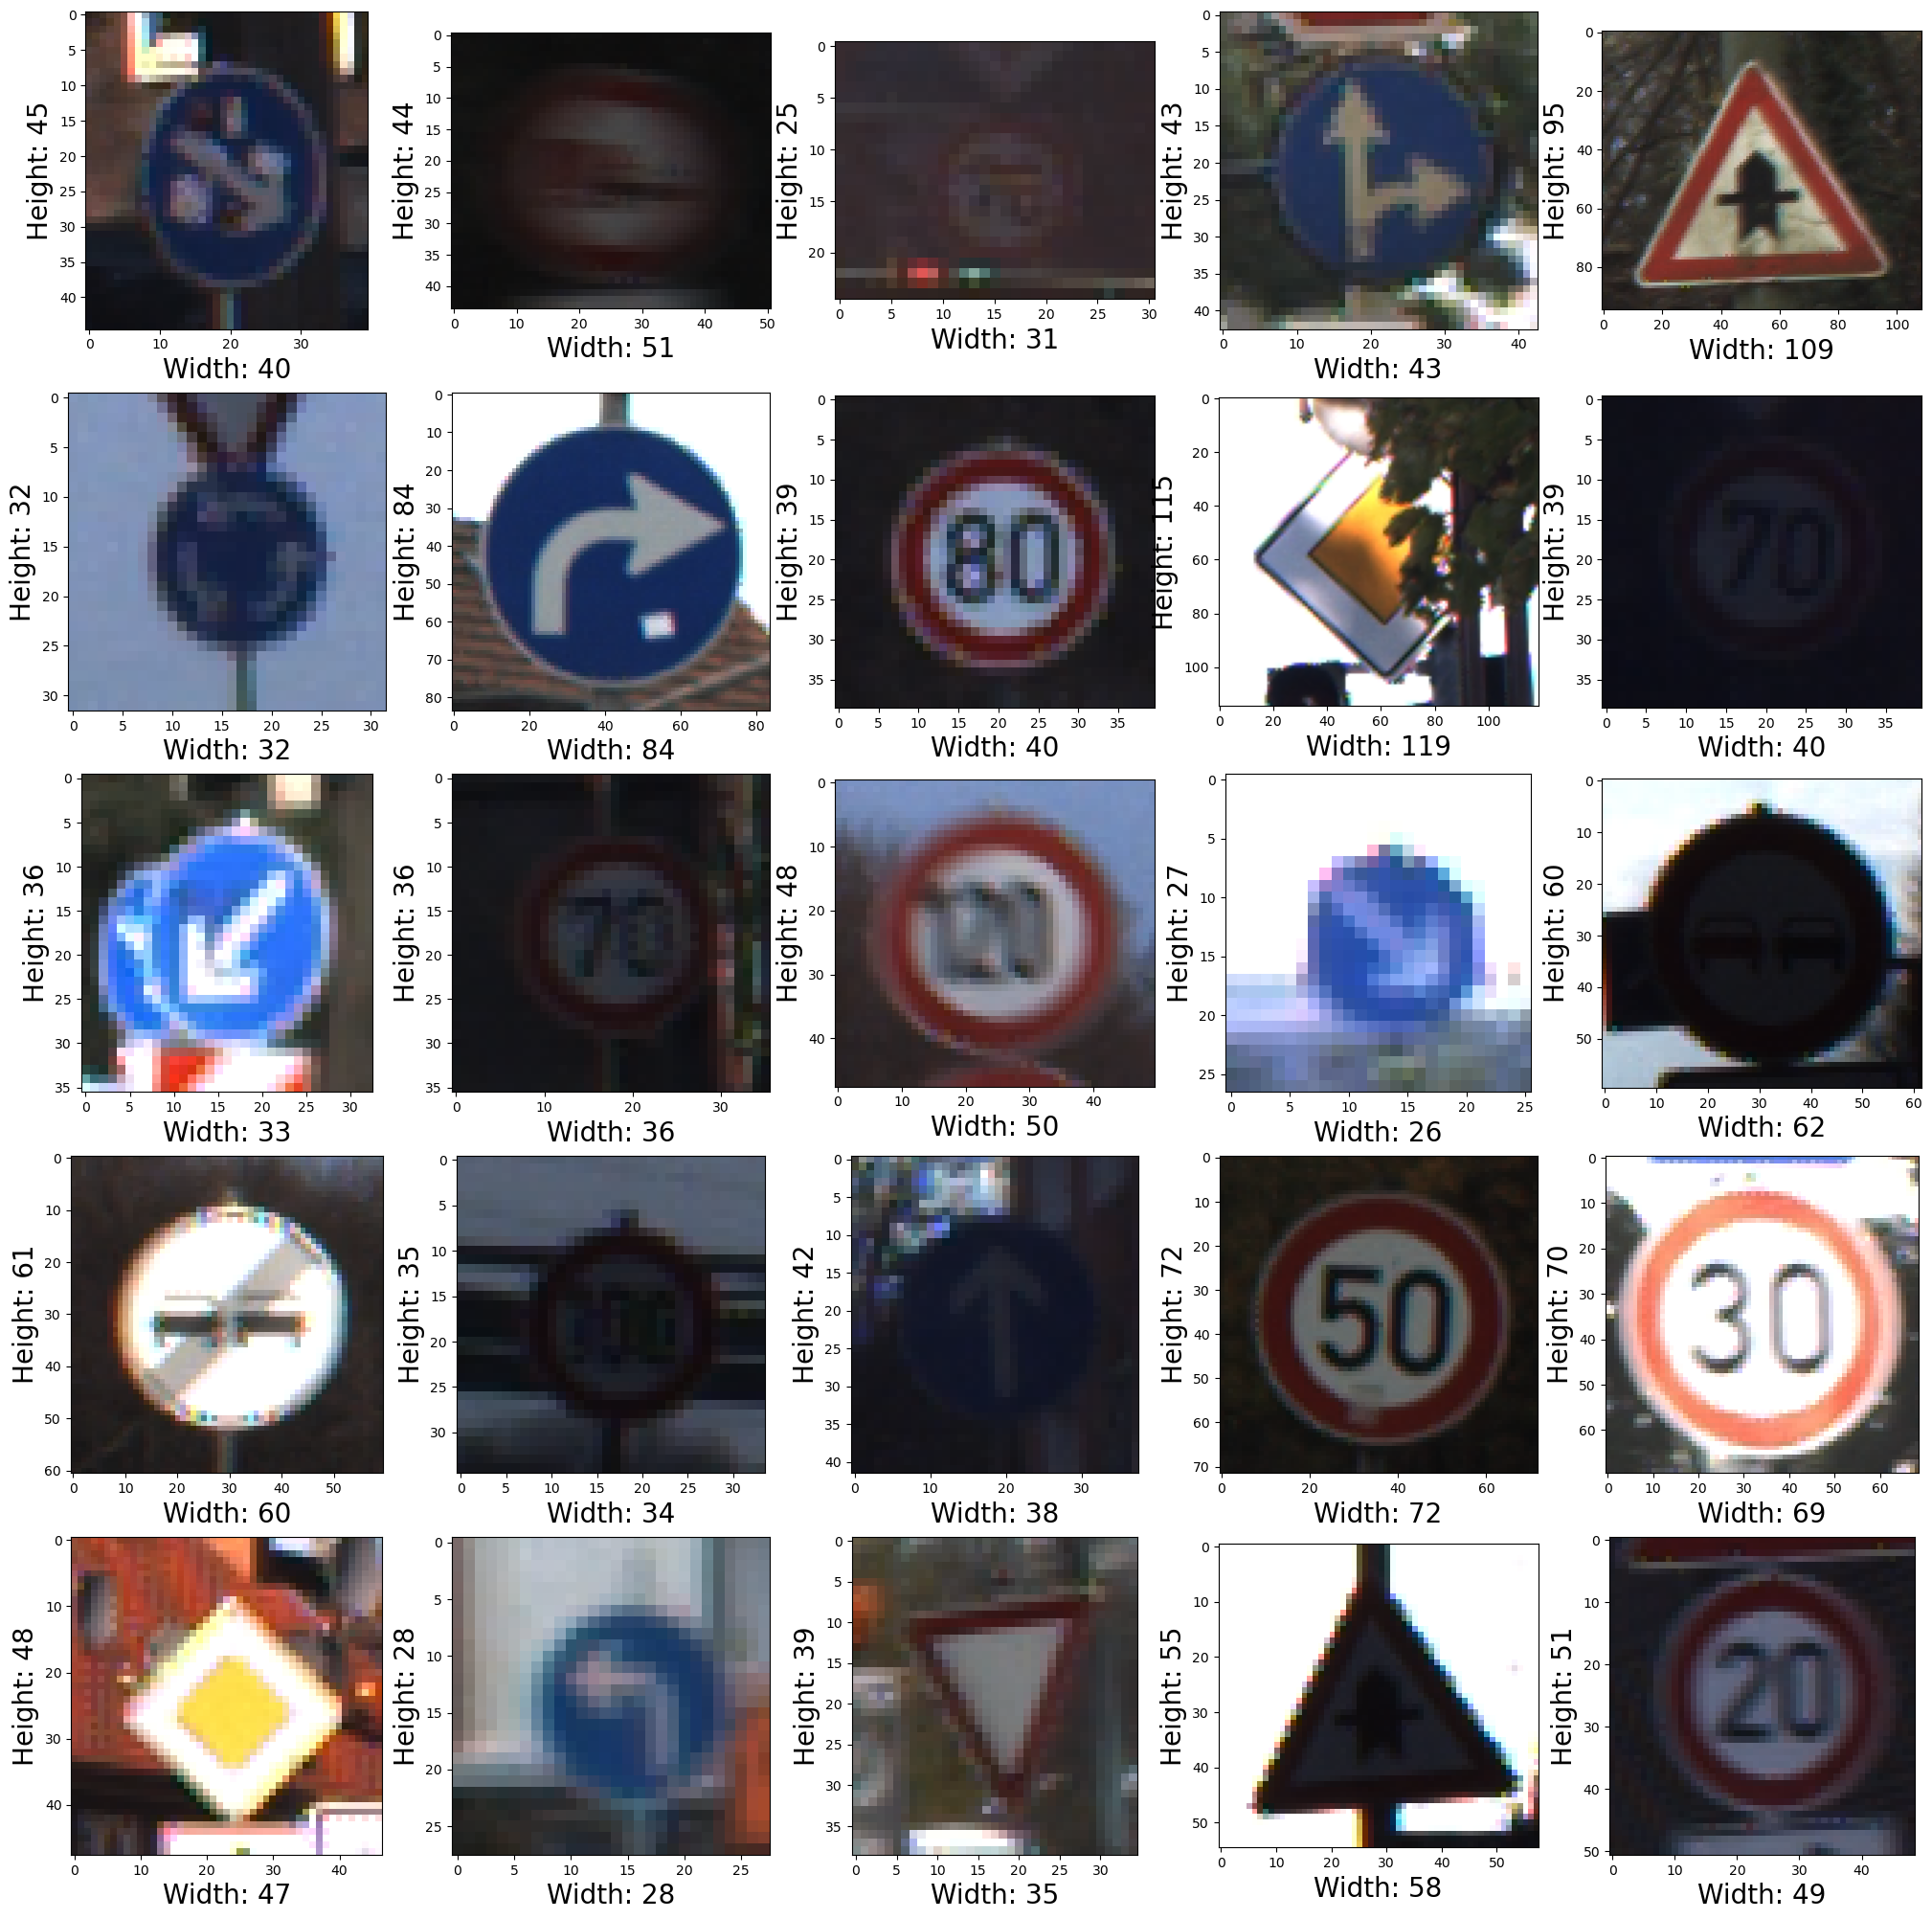

In [23]:
import random
import pandas as pd
from matplotlib.image import imread


# Set the local dataset path
data_dir = r"F:\Universty\GP\line detection\Dataset"
test_csv_path = os.path.join(data_dir, "Test.csv")

# Load the test CSV file
test = pd.read_csv(test_csv_path)

# Get the list of image paths from the CSV
imgs = test["Path"].values

# Plot 25 random images
plt.figure(figsize=(25, 25))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    
    # Pick a random image from the test dataset
    random_img_path = os.path.join(data_dir, random.choice(imgs))
    
    # Load and display the image
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    
    # Remove grid and set labels
    plt.grid(False)
    plt.xlabel(f"Width: {rand_img.shape[1]}", fontsize=20)
    plt.ylabel(f"Height: {rand_img.shape[0]}", fontsize=20)

plt.show()


In [26]:


# Initialize lists for images and labels
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = os.path.join(data_dir, 'Train', str(i))
    
    if not os.path.exists(path):
        print(f"❌ Warning: Category folder '{path}' does not exist!")
        continue

    images = os.listdir(path)

    for img in images:
        img_path = os.path.join(path, img)

        try:
            image = cv2.imread(img_path)
            
            if image is None:
                print(f"⚠ Skipping unreadable image: {img_path}")
                continue
            
            # Convert BGR to RGB and resize
            image_fromarray = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            
            # Append data
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except Exception as e:
            print(f"❌ Error processing {img_path}: {e}")

# Convert lists to numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)


(39209, 30, 30, 3) (39209,)


In [27]:
shuffle_indexes = np.arange(image_data.shape[0])  # Create array of indexes [0, 1, 2, ... N]
np.random.shuffle(shuffle_indexes)  # Shuffle the indexes
image_data = image_data[shuffle_indexes]  # Reorder images
image_labels = image_labels[shuffle_indexes]  # Reorder labels


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [29]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [30]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [31]:
from tensorflow.keras.optimizers import Adam

lr = 0.001
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

c:\Users\Ismail\.conda\envs\myenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 57s 64ms/step - loss: 1.0889 - accuracy: 0.7060 - val_loss: 0.0924 - val_accuracy: 0.9726
Epoch 2/30
858/858 [==============================] - 52s 60ms/step - loss: 0.1881 - accuracy: 0.9430 - val_loss: 0.0404 - val_accuracy: 0.9876
Epoch 3/30
858/858 [==============================] - 43s 50ms/step - loss: 0.1096 - accuracy: 0.9665 - val_loss: 0.0451 - val_accuracy: 0.9867
Epoch 4/30
858/858 [==============================] - 47s 54ms/step - loss: 0.0834 - accuracy: 0.9732 - val_loss: 0.0226 - val_accuracy: 0.9934
Epoch 5/30
858/858 [==============================] - 53s 62ms/step - loss: 0.0599 - accuracy: 0.9815 - val_loss: 0.0251 - val_accuracy: 0.9926
Epoch 6/30
858/858 [==============================] - 49s 57ms/step - loss: 0.0597 - accuracy: 0.9824 - val_loss: 0.0125 - val_accuracy: 0.9963
Epoch 7/30
858/858 [==============================] - 60s 70ms/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0092 - val_accuracy:

In [33]:
model.save("model.h5")


In [34]:

output_dir = r"F:\Universty\GP\line detection\Dataset\output"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the model weights
model.save_weights(os.path.join(output_dir, "model_weights.h5"))


In [35]:
dir(aug)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standardize',
 'std',
 'vertica

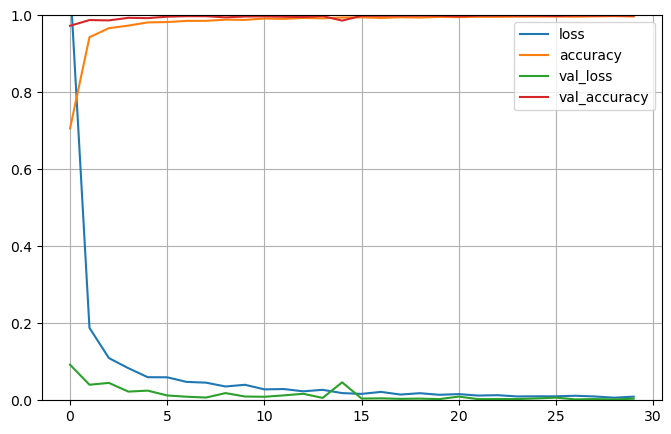

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [37]:
import os
import pandas as pd
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score

# Define dataset path
data_dir = r"F:\Universty\GP\line detection\Dataset"

# Load test data
test = pd.read_csv(os.path.join(data_dir, "Test.csv"))

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

for img in imgs:
    try:
        img_path = os.path.join(data_dir, img)
        image = cv2.imread(img_path)

        if image is None:
            print(f"Warning: Unable to load {img_path}")
            continue

        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except Exception as e:
        print(f"Error processing {img}: {e}")

# Convert list to NumPy array & normalize
X_test = np.array(data) / 255.0

# Predict classes
pred = np.argmax(model.predict(X_test), axis=1)

# Accuracy with test data
print('Test Data accuracy: ', accuracy_score(labels, pred) * 100)


395/395 [==============================] - 2s 6ms/step
Test Data accuracy:  72.86619160728425


In [38]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

<Axes: >

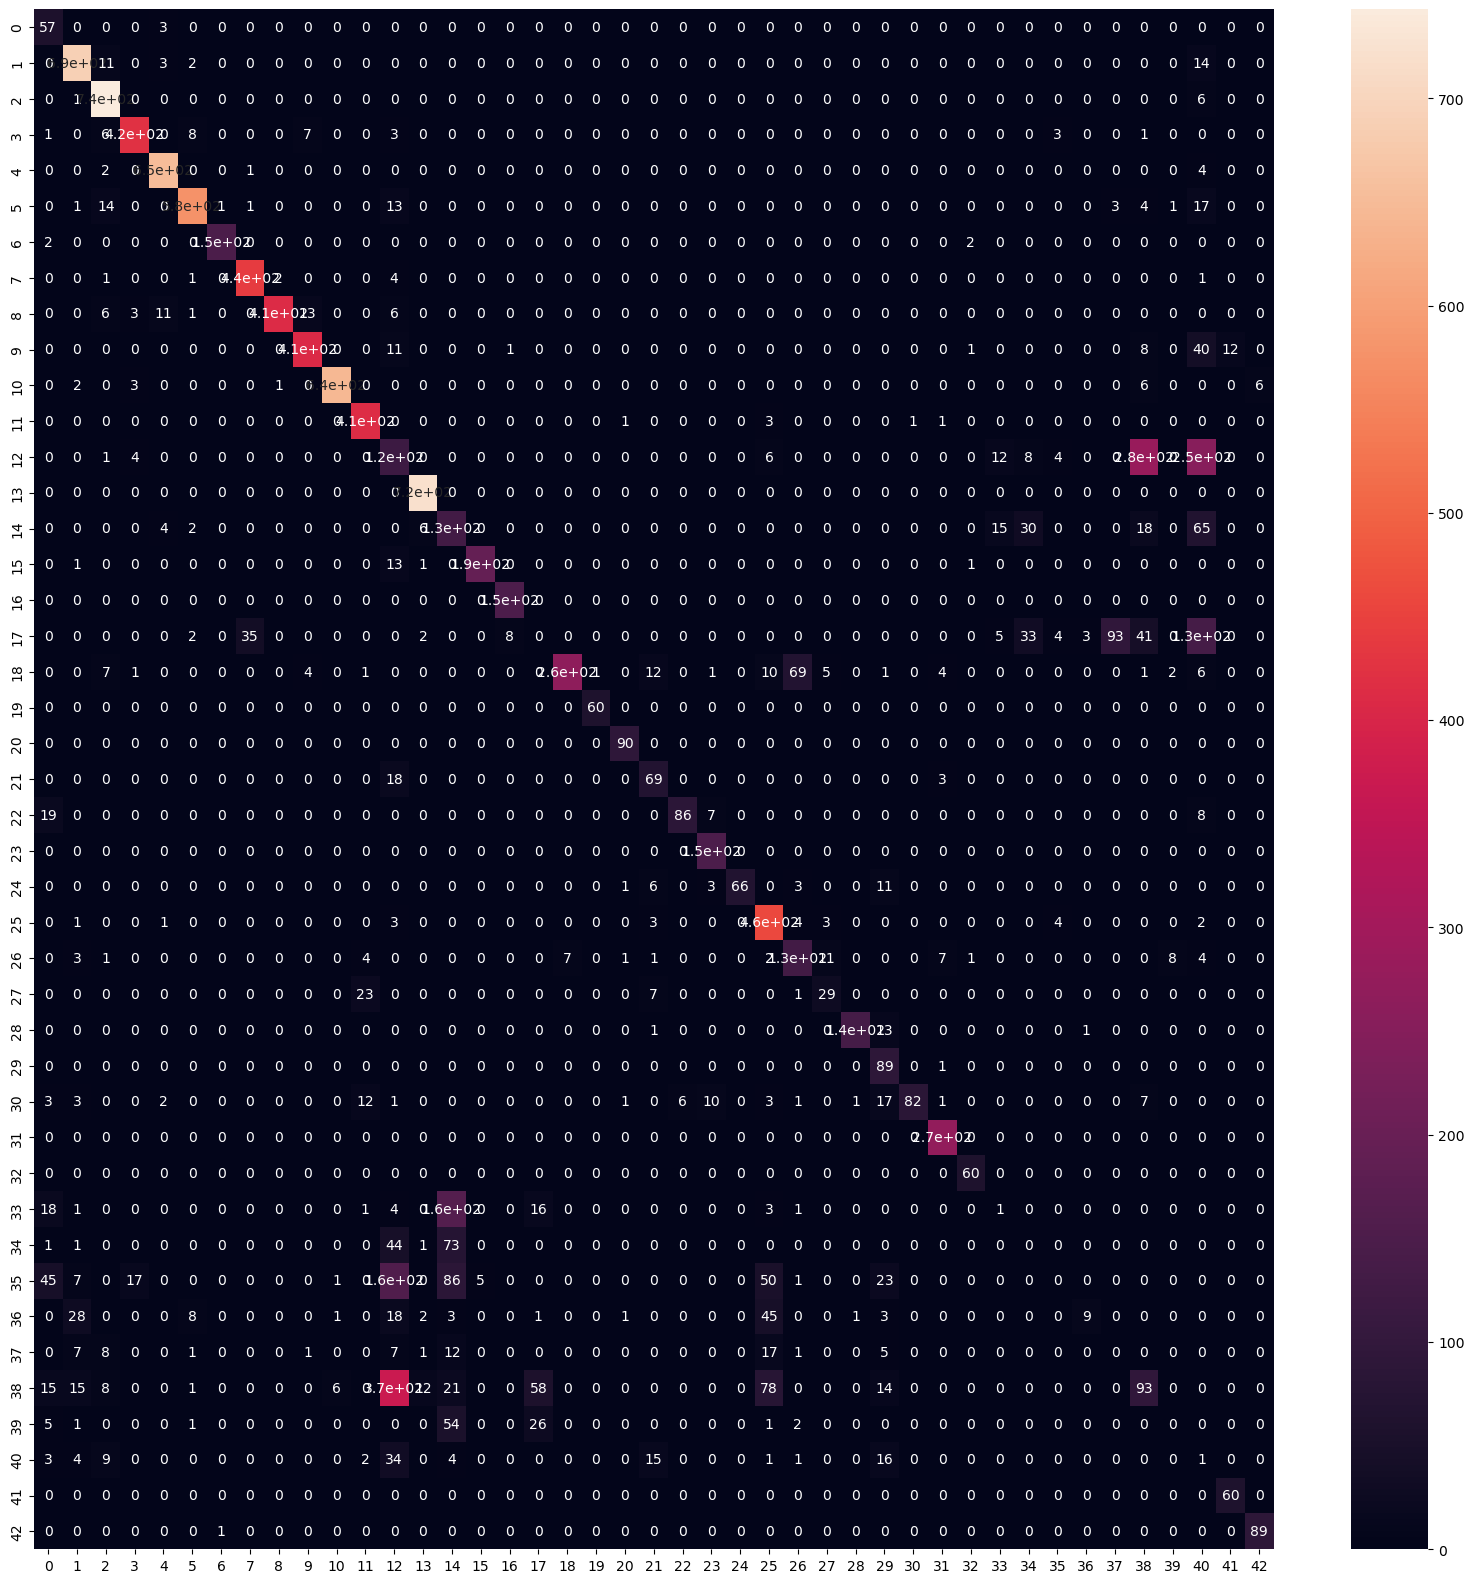

In [40]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.34      0.95      0.50        60
           1       0.90      0.96      0.93       720
           2       0.91      0.99      0.95       750
           3       0.94      0.94      0.94       450
           4       0.96      0.99      0.98       660
           5       0.96      0.91      0.93       630
           6       0.99      0.97      0.98       150
           7       0.92      0.98      0.95       450
           8       0.99      0.91      0.95       450
           9       0.94      0.85      0.89       480
          10       0.99      0.97      0.98       660
          11       0.91      0.99      0.94       420
          12       0.14      0.17      0.15       690
          13       0.97      1.00      0.98       720
          14       0.24      0.48      0.32       270
          15       0.97      0.92      0.95       210
          16       0.94      1.00      0.97       150
          17       0.00    

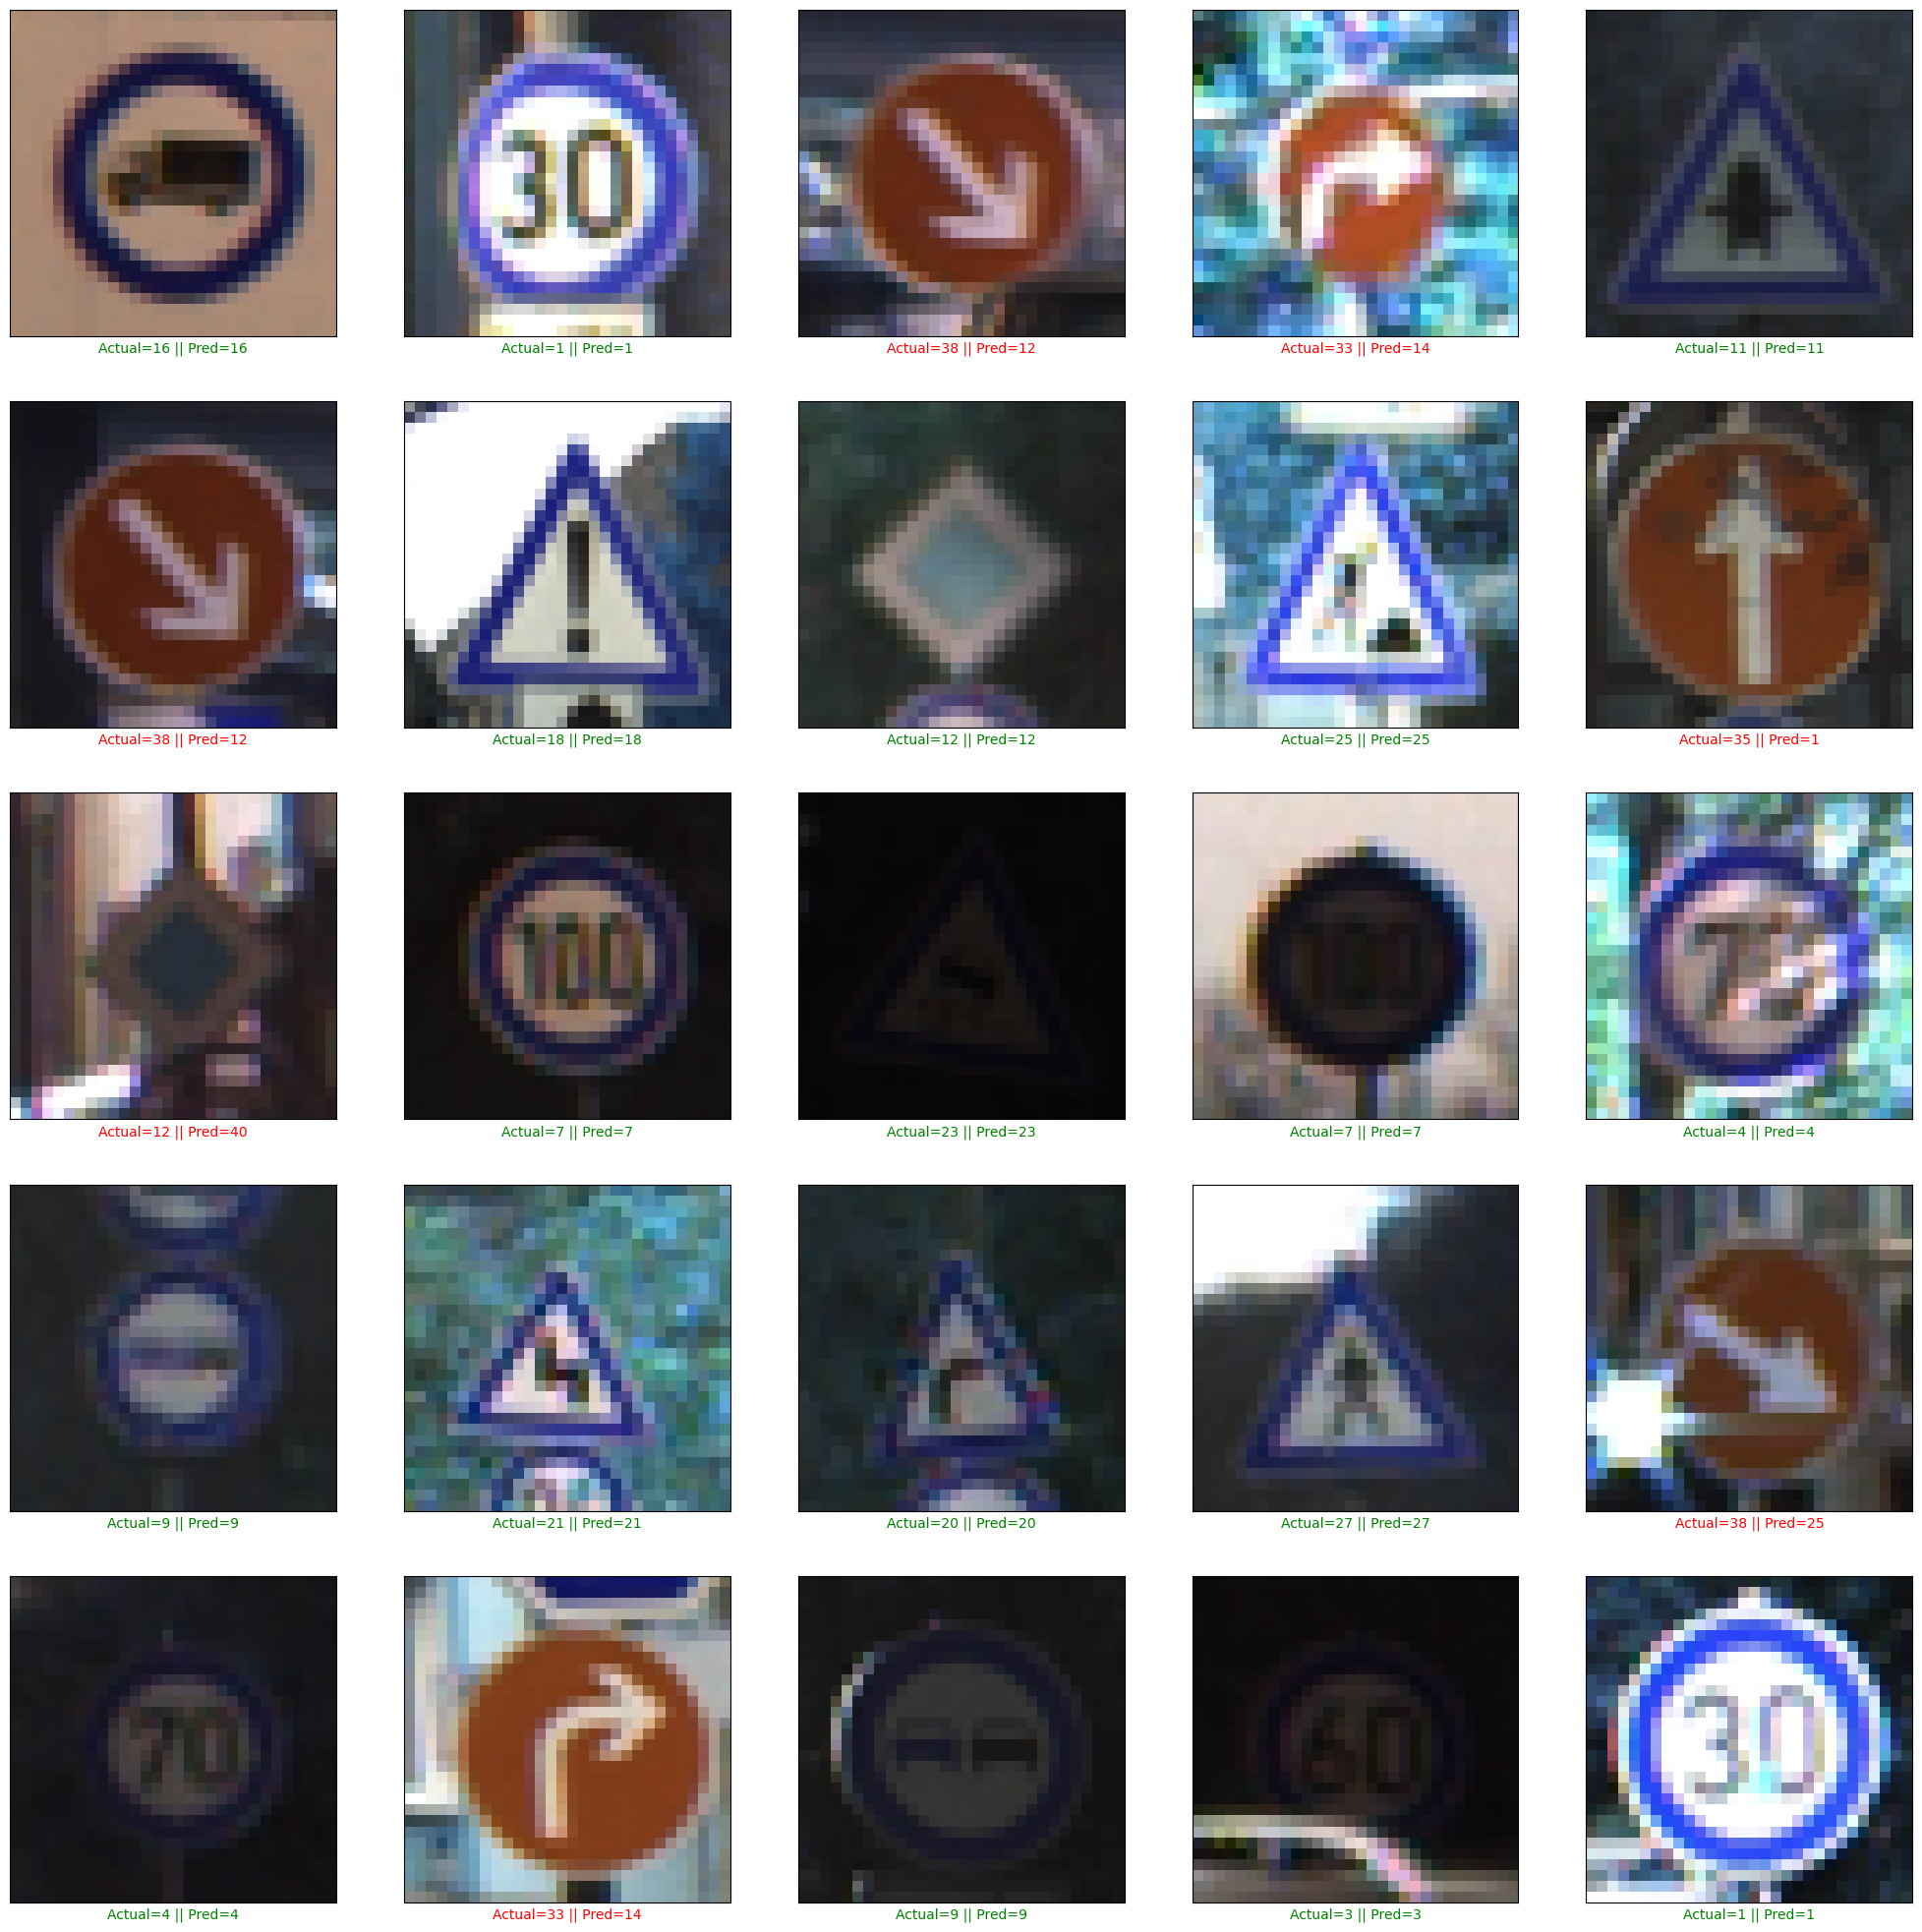

In [42]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [43]:
ls

 Volume in drive F has no label.
 Volume Serial Number is AEB4-788B

 Directory of f:\Universty\GP\line detection

02/27/2025  06:47 PM    <DIR>          .
01/31/2025  01:56 PM    <DIR>          ..
02/27/2025  04:45 PM       641,568,792 archive (2).zip
02/27/2025  06:48 PM    <DIR>          Dataset
01/31/2025  02:01 PM         8,344,918 Lane Detection Test Video 01.mp4
01/31/2025  05:23 PM             4,362 line_detection.ipynb
01/31/2025  05:23 PM            16,882 line2detection.ipynb
01/31/2025  05:23 PM             8,074 line3detection.ipynb
02/27/2025  07:25 PM        14,133,180 model.h5
01/31/2025  02:40 PM         2,641,803 solidWhiteRight.mp4
01/31/2025  05:13 PM         8,008,635 solidYellowLeft.mp4
02/24/2025  11:10 PM                 0 Traffic_sign.ipynb
               9 File(s)    674,726,646 bytes
               3 Dir(s)  462,342,823,936 bytes free


In [47]:
import os
print("Current working directory:", os.getcwd())
print("Files in directory:", os.listdir())


Current working directory: f:\Universty\GP\line detection
Files in directory: ['archive (2).zip', 'Dataset', 'Lane Detection Test Video 01.mp4', 'line2detection.ipynb', 'line3detection.ipynb', 'line_detection.ipynb', 'model.h5', 'solidWhiteRight.mp4', 'solidYellowLeft.mp4', 'Traffic_sign.ipynb']


In [4]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import os

# Load the trained model
model_path = r"F:\Universty\GP\line detection\model.h5"
loaded_model = tf.keras.models.load_model(model_path)

# Define the image path
image_path = r"F:\Universty\GP\line detection\Dataset\Train\8\00008_00004_00029.png"


# Check if the image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"❌ Error: Image '{image_path}' not found!")

# Read and process the image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"❌ Error: Image '{image_path}' is unreadable!")

# Convert BGR to RGB and resize
image_fromarray = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
resize_image = image_fromarray.resize((30, 30))  # Adjust to your model's input size

# Convert to NumPy array and normalize
input_data = np.expand_dims(np.array(resize_image), axis=0) / 255.0  # Normalize

# Predict using the model
pred = loaded_model.predict(input_data)

# Get the class with the highest probability
result_class = np.argmax(pred)

# Get the corresponding label
predicted_label = classes.get(result_class, "Unknown")

# Display the result
print(f"🚦 Predicted Traffic Sign: {predicted_label}")


1/1 [==============================] - 0s 192ms/step
🚦 Predicted Traffic Sign: Speed limit (120km/h)


In [54]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image

# Load the trained model
model_path = r"F:\Universty\GP\line detection\model.h5"
loaded_model = tf.keras.models.load_model(model_path)



# Open video file
video_path = r"C:\Users\Ismail\Downloads\traffic signs test.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("❌ Error: Could not open video file.")
    exit()

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if video ends

    # Resize the frame for the model
    frame_resized = cv2.resize(frame, (30, 30))  # Adjust to match your model input
    frame_array = np.expand_dims(np.array(frame_resized), axis=0) / 255.0  # Normalize

    # Predict traffic sign
    pred = loaded_model.predict(frame_array)
    result_class = np.argmax(pred)
    predicted_label = classes.get(result_class, "Unknown")

    # Display prediction on frame
    cv2.putText(frame, f"Sign: {predicted_label}", (50, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show video
    cv2.imshow("Traffic Sign Detection", frame)

    # Press 'q' to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 42ms/step


KeyboardInterrupt: 